In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy
import datetime

In [30]:
data_file = "preprocessing/data/complete_dataset.csv"
log_file = "preprocessing/data/raw_data/survey_data/user_ip.csv"

logs = pd.read_csv(log_file, sep=";")

data = pd.read_csv(data_file, sep=";")
pd.options.plotting.backend = 'matplotlib'

data.system.replace(1, "Biodiv 1", inplace=True)
data.system.replace(2, "Biodiv 2", inplace=True)

data["issue_occurred"] = data.total_issues > 0
data["no_issue"] = data.total_issues == 0

colors5I = ['midnightblue','steelblue','lightgrey','lightsteelblue','aliceblue']
colors5 = ['aliceblue', 'lightsteelblue', 'lightgrey', 'steelblue', 'midnightblue']
colors4 = ['lightsteelblue', 'lightgrey', 'steelblue', 'midnightblue']
#colors3a = ['lightsteelblue', 'steelblue', 'midnightblue']
#matplot "No success", "Partial success", "Full success"
colors3 = ['lightsteelblue', 'steelblue', 'midnightblue']

#matplot "Biodiv1 ", "Biodiv 2", "no difference"
colors2Grey = ['lightgrey', 'orange','navajowhite' ]

#matplot "Biodiv1 ", "Biodiv 2"
colors2 = ['navajowhite','orange']

#matplot issues: functional, content, comprehensibility, presentation
colorsIssues = ['aliceblue', 'lightsteelblue', 'steelblue', 'midnightblue']

#seaborn palette, "No success", "Partial success", "Full success"
lightB = mcolors.to_hex("lightsteelblue", keep_alpha=False)
steelB = mcolors.to_hex("steelblue", keep_alpha=False)
midnightB = mcolors.to_hex("midnightblue", keep_alpha=False)
paletteSuccess =[lightB,steelB,midnightB]

#seaborn palette for systems
lightO = mcolors.to_hex("navajowhite", keep_alpha=False)
darkO = mcolors.to_hex("orange", keep_alpha=False)
paletteSystem =[darkO,lightO]
data.head()

,Unnamed: 0,user,task,system,success,issues_functional,issues_content,issues_comprehensibity,issues_presentation,task_minutes,...,searchUsage,exit_easyToLearn,exit_easyToUse,bestOverall,total_issues,SUS_Biodiv1,SUS_Biodiv2,task_full_time,issue_occurred,no_issue
0,0,1,1,Biodiv 2,2,NaN,NaN,NaN,1.0,5,...,3,no difference,no difference,no difference,1.0,70.0,65.0,300,True,False
1,1,1,2,Biodiv 2,1,1.0,NaN,NaN,NaN,5,...,3,no difference,no difference,no difference,1.0,70.0,65.0,300,True,False
2,2,1,3,Biodiv 2,2,1.0,NaN,NaN,NaN,4,...,3,no difference,no difference,no difference,1.0,70.0,65.0,240,True,False
3,3,1,4,Biodiv 1,1,NaN,NaN,NaN,NaN,5,...,3,no difference,no difference,no difference,0.0,70.0,65.0,300,False,True
4,4,1,5,Biodiv 1,2,NaN,1.0,NaN,NaN,2,...,3,no difference,no difference,no difference,1.0,70.0,65.0,170,True,False


# Univariate descriptive analysis


## Descriptive analysis per system

In [31]:
data.loc[data.system == 1,"sus"] = data.SUS_Biodiv1
data.loc[data.system == 2,"sus"] = data.SUS_Biodiv2

data_sys = data.groupby("system")

# in sus_data we make sure that every user only occurs once by only selecting task no. 1
# so that we can use it to describe sus-scores
sus_data = data[data.task == 1]

# Exit questions and Statistics

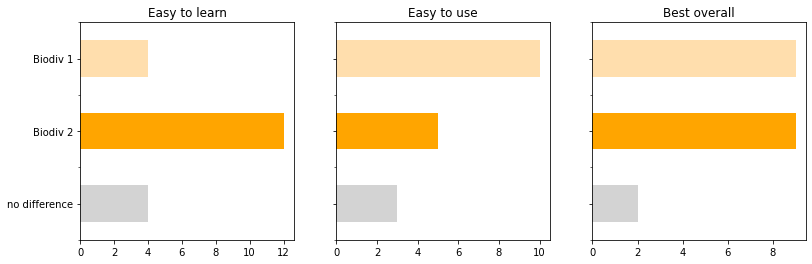

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,4), sharey=True)

sus_data.exit_easyToLearn.value_counts(sort=False).sort_index(ascending=False).plot(kind="barh", ax=axes[0],color=colors2Grey)
axes[0].set_title("Easy to learn")

sus_data.exit_easyToUse.value_counts(sort=False).sort_index(ascending=False).plot(kind="barh", ax=axes[1],color=colors2Grey)
axes[1].set_title("Easy to use")
#
fig = sus_data.bestOverall.value_counts(sort=False).sort_index(ascending=False).plot(kind="barh", ax=axes[2],color=colors2Grey)
axes[2].set_title("Best overall")

today = datetime.datetime.today()
plt.savefig('exitEasyBest.pdf',bbox_inches='tight',metadata={"Title":"Exit questionnaire, Easy to learn, Easy to use, Best overall", "Author":"Felicitas Löffler","Subject":"Results of the exit questionnaire, user evaluation semantic dataset search","Keywords":"Exit questionnaire NIST, Easy to learn, Easy to use, Best overall, semantic dataset search","CreationDate":today})

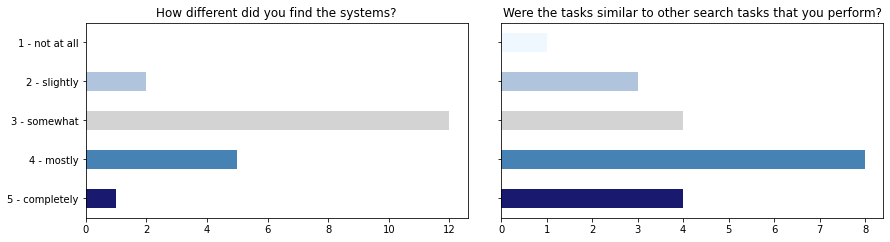

In [33]:
recoded = sus_data["searchExperience[SQ003]"].replace({1:"1 - not at all", 2:"2 - slightly", 3:"3 - somewhat", 4:"4 - mostly", 5:"5 - completely"})
similarTask = sus_data["searchExperience[SQ002]"].replace({1:"1 - not at all", 2:"2 - slightly", 3:"3 - somewhat", 4:"4 - mostly", 5:"5 - completely"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4), sharey=True)
recoded.value_counts(sort=False).sort_index(ascending=False).plot(kind="barh", ax=axes[0],color=colors5I)
axes[0].set_title("How different did you find the systems?")

similarTask.value_counts(sort=False).sort_index(ascending=False).plot(kind="barh",ax=axes[1],color=colors5I)
axes[1].set_title("Were the tasks similar to other search tasks that you perform?")

fig.tight_layout(pad=3.0)
fig.savefig('howDifferentSimilar.pdf',bbox_inches='tight')

### Statistics

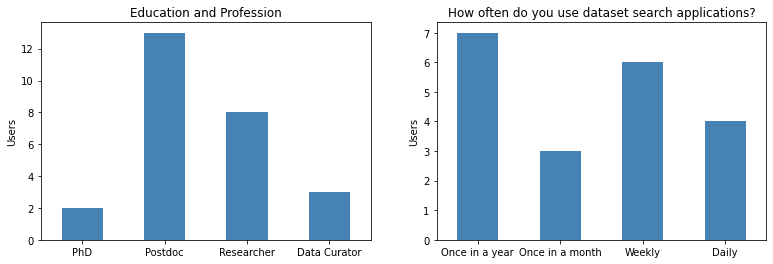

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4), sharey=False)

# education[SQ001] - education[SQ008]
sus_data = data[data.task == 1]
edu0 = sus_data["education[SQ004]"].replace({"No":0, "Yes":1})
edu1 = sus_data["education[SQ005]"].replace({"No":0, "Yes":1})
edu2 = sus_data["education[SQ007]"].replace({"No":0, "Yes":1})
edu3 = sus_data["education[SQ008]"].replace({"No":0, "Yes":1})

education = pd.DataFrame( [edu0,edu1,edu2,edu3] ).transpose().sum(axis=0)
education.head()
education.index = ("PhD","Postdoc", "Researcher", "Data Curator")
education.plot(kind="bar",title="Education and Profession",ax=axes[0],legend=False,rot=0,color='steelblue')

axes[0].set_ylabel("Users")
#axes[0].set_xlabel("Graduation and Profession Types")

# searchUsage
sus_data = data[data.task == 1]

searchExp = sus_data["searchUsage"].value_counts(sort=False).sort_index(ascending=True)
#searchExp.head()
searchExp.index = ("Once in a year","Once in a month", "Weekly", "Daily")
searchExp.plot(kind="bar",title="How often do you use dataset search applications?",ax=axes[1],legend=False,rot=0,color='steelblue')

axes[1].set_ylabel("Users")
#axes[1].set_xlabel("Dataset Search Usage")

fig.savefig('statistics.pdf',bbox_inches='tight')

Text(0, 0.5, 'Users')

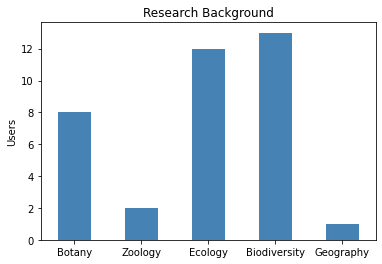

In [35]:

# education[SQ001] - education[SQ008]
sus_data = data[data.task == 1]
research1 = sus_data["researchBackground[SQ001]"].replace({"No":0, "Yes":1})
research2 = sus_data["researchBackground[SQ002]"].replace({"No":0, "Yes":1})
research3 = sus_data["researchBackground[SQ003]"].replace({"No":0, "Yes":1})
research4 = sus_data["researchBackground[SQ004]"].replace({"No":0, "Yes":1})
research5 = sus_data["researchBackground[SQ005]"].replace({"No":0, "Yes":1})
#research6 = sus_data["researchBackground[SQ006]"].replace({"No":0, "Yes":1})

research = pd.DataFrame( [research1,research2,research3,research4,research5] ).transpose().sum(axis=0)
research.head()
research.index = ("Botany","Zoology", "Ecology", "Biodiversity","Geography")
fig = research.plot(kind="bar",title="Research Background",legend=False,rot=0,color='steelblue')
fig.set_ylabel("Users")

### SUS-Scores

count    20.000000
mean     68.250000
std       8.962642
min      50.000000
25%      61.250000
50%      68.750000
75%      75.625000
max      82.500000
Name: SUS_Biodiv1, dtype: float64
count    20.0000
mean     71.1250
std      12.2602
min      42.5000
25%      65.0000
50%      72.5000
75%      78.1250
max      97.5000
Name: SUS_Biodiv2, dtype: float64


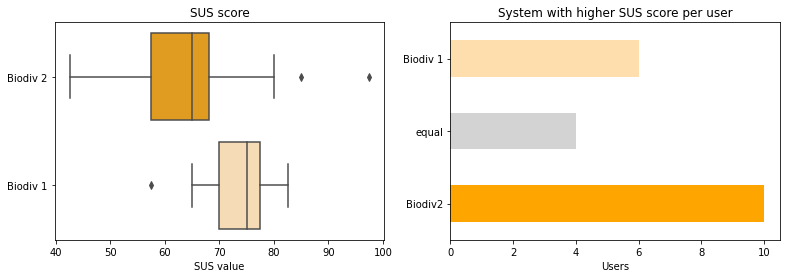

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4), sharey=False)

dta = sus_data[["system", "SUS_Biodiv1", "SUS_Biodiv2"]].melt(id_vars="system")

sns.set_palette(sns.color_palette(paletteSystem))
fig = sns.boxplot(
    x = dta.value,
    y = dta.system,
    ax = axes[0]
)

#fig.invert_yaxis()
fig.set_ylabel("")
fig.set_xlabel("SUS value")
fig.set_title("SUS score")

print( sus_data.SUS_Biodiv1.describe() )
print( sus_data.SUS_Biodiv2.describe() )

higher_sus2 = sus_data.SUS_Biodiv2 > sus_data.SUS_Biodiv1
higher_sus1 = sus_data.SUS_Biodiv1 > sus_data.SUS_Biodiv2
equal_sus = sus_data.SUS_Biodiv1 == sus_data.SUS_Biodiv2

winners = pd.DataFrame( [higher_sus1, equal_sus, higher_sus2] ).transpose().sum(axis=0)
winners.index = ("Biodiv 1", "equal", "Biodiv2")

colors2Grey = ['navajowhite', 'lightgrey','orange']
fig = winners.plot(kind="barh",color=colors2Grey)
#fig.set_ylabel("System")
fig.set_xlabel("Users")
fig.set_title("System with higher SUS score per user")
fig.invert_yaxis()

plt.savefig('SUSscore.pdf',bbox_inches='tight')



### Query input

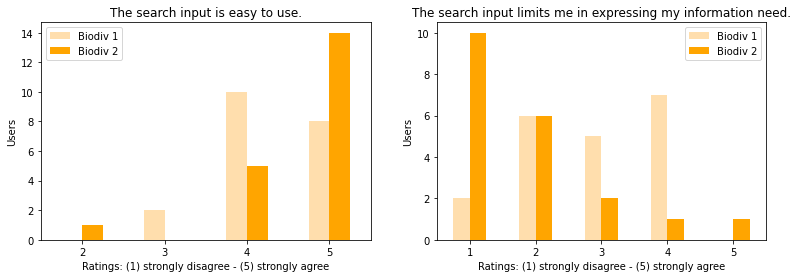

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4), sharey=False)

sus_data = data[data.task == 1]

#The search input is easy to use.
SUS_queryInputEasy= sus_data[["feedbackB1[SQ001]","feedbackB2[SQ001]"]].apply(pd.Series.value_counts)
SUS_queryInputEasy.columns = ["Biodiv 1", "Biodiv 2"]
SUS_queryInputEasy.plot(kind="bar", ax=axes[0],legend=True, title="The search input is easy to use.",rot=0,color=colors2)

axes[0].set_xlabel("Ratings: (1) strongly disagree - (5) strongly agree")
axes[0].set_ylabel("Users")


#The search input limits me in expressing my information need.
SUS_queryInputLimit = sus_data[["feedbackB1[SQ002]", "feedbackB2[SQ002]"]].apply(pd.Series.value_counts)
SUS_queryInputLimit.columns = ["Biodiv 1", "Biodiv 2"]

SUS_queryInputLimit.plot(kind="bar", ax=axes[1], legend=True, title="The search input limits me in expressing my information need.", rot=0,color=colors2)
axes[1].set_xlabel("Ratings: (1) strongly disagree - (5) strongly agree")
axes[1].set_ylabel("Users")

fig.savefig('searchInput.pdf',bbox_inches='tight')

### Default highlights

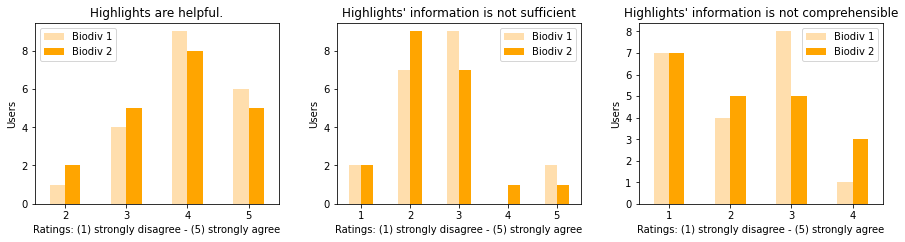

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,4), sharey=False)

sus_data = data[data.task == 1]


#For me, the default highlights in the search result are helpful to find relevant datasets more easily.
SUS_highlightsHelpful = sus_data[["feedbackB1[SQ003]", "feedbackB2[SQ003]"]].apply(pd.Series.value_counts).sort_index(ascending=True)
SUS_highlightsHelpful.columns = ["Biodiv 1", "Biodiv 2"]

SUS_highlightsHelpful.plot(kind="bar", ax=axes[0], legend=True, title="Highlights are helpful.", rot=0,color=colors2)
axes[0].set_xlabel("Ratings: (1) strongly disagree - (5) strongly agree")
axes[0].set_ylabel("Users")

#I think, the information for the default highlights (mouseover) is not sufficient.
SUS_highlightsSufficient = sus_data[["feedbackB1[SQ004]", "feedbackB2[SQ004]"]].apply(pd.Series.value_counts)
SUS_highlightsSufficient.columns = ["Biodiv 1", "Biodiv 2"]

SUS_highlightsSufficient.plot(kind="bar", ax=axes[1], legend=True, title="Highlights' information is not sufficient", rot=0,color=colors2)
axes[1].set_xlabel("Ratings: (1) strongly disagree - (5) strongly agree")
axes[1].set_ylabel("Users")

#I think, the information for the default highlights (mouseover) is not comprehensible. 
SUS_highlightsComprehensible = sus_data[["feedbackB1[SQ005]", "feedbackB2[SQ005]"]].apply(pd.Series.value_counts)
SUS_highlightsComprehensible.columns = ["Biodiv 1", "Biodiv 2"]

SUS_highlightsComprehensible.plot(kind="bar", ax=axes[2], legend=True, title="Highlights' information is not comprehensible", rot=0,color=colors2)
axes[2].set_xlabel("Ratings: (1) strongly disagree - (5) strongly agree")
axes[2].set_ylabel("Users")

fig.tight_layout(pad=3.0)
fig.savefig('defaultHighlighting.pdf',bbox_inches='tight')


### Biological Entities Highlights

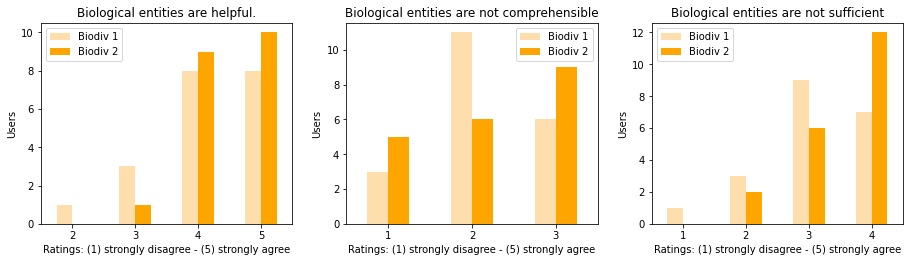

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,4), sharey=False)

sus_data = data[data.task == 1]

#Highlighting biological entities helps me to better understand what this dataset is about. 
SUS_biohighlightsHelpful = sus_data[["feedbackB1[SQ006]", "feedbackB2[SQ006]"]].apply(pd.Series.value_counts)
SUS_biohighlightsHelpful.columns = ["Biodiv 1", "Biodiv 2"]

SUS_biohighlightsHelpful.plot(kind="bar", ax=axes[0], legend=True, title="Biological entities are helpful.", rot=0,color=colors2)
axes[0].set_xlabel("Ratings: (1) strongly disagree - (5) strongly agree")
axes[0].set_ylabel("Users")

#The provided information for each biological entity is not comprehensible.
SUS_biohighlightsNotComprehensible = sus_data[["feedbackB1[SQ007]", "feedbackB2[SQ007]"]].apply(pd.Series.value_counts)
SUS_biohighlightsNotComprehensible.columns = ["Biodiv 1", "Biodiv 2"]

SUS_biohighlightsNotComprehensible.plot(kind="bar", ax=axes[1], legend=True, title="Biological entities are not comprehensible", rot=0,color=colors2)
axes[1].set_xlabel("Ratings: (1) strongly disagree - (5) strongly agree")
axes[1].set_ylabel("Users")

#I think, the information provided for each biological entity is sufficient.
SUS_biohighlightsSufficient = sus_data[["feedbackB1[SQ008]", "feedbackB2[SQ008]"]].apply(pd.Series.value_counts)
SUS_biohighlightsSufficient.columns = ["Biodiv 1", "Biodiv 2"]

axes[2] = SUS_biohighlightsSufficient.plot(kind="bar", ax=axes[2], legend=True, title="Biological entities are not sufficient", rot=0,color=colors2)
axes[2].set_xlabel("Ratings: (1) strongly disagree - (5) strongly agree")
axes[2].set_ylabel("Users")

fig.tight_layout(pad=2.0)
fig.savefig('biologicalEntities.pdf',bbox_inches='tight')


### Query explanation

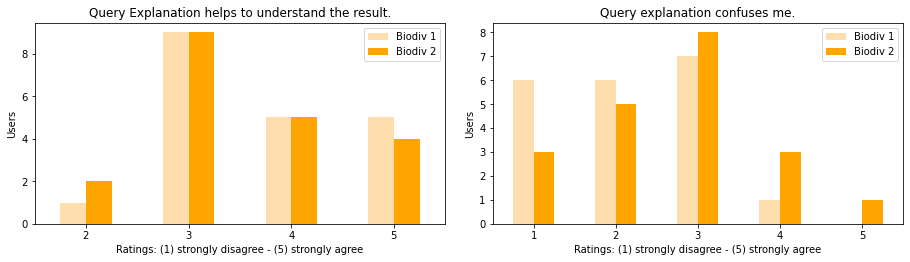

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4), sharey=False)

sus_data = data[data.task == 1]

#The query explanation helps me to understand the search result.
SUS_queryExpHelpful = sus_data[["feedbackB1[SQ009]", "feedbackB2[SQ009]"]].apply(pd.Series.value_counts)
SUS_queryExpHelpful.columns = ["Biodiv 1", "Biodiv 2"]

SUS_queryExpHelpful.plot(kind="bar", ax=axes[0], legend=True, title="Query Explanation helps to understand the result.", rot=0,color=colors2)
axes[0].set_xlabel("Ratings: (1) strongly disagree - (5) strongly agree")
axes[0].set_ylabel("Users")

#The query explanation confuses me.
SUS_queryExpConfuse = sus_data[["feedbackB1[SQ010]", "feedbackB2[SQ010]"]].apply(pd.Series.value_counts)
SUS_queryExpConfuse.columns = ["Biodiv 1", "Biodiv 2"]

SUS_queryExpConfuse.plot(kind="bar", ax=axes[1], legend=True, title="Query explanation confuses me.", rot=0,color=colors2)
axes[1].set_xlabel("Ratings: (1) strongly disagree - (5) strongly agree")
axes[1].set_ylabel("Users")

fig.tight_layout(pad=2.0)
fig.savefig('queryExplanation.pdf',bbox_inches='tight')


### Issues

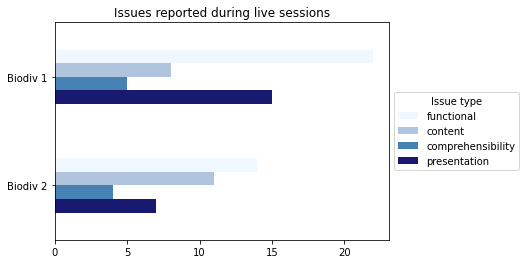

In [41]:
fig = data_sys[['issues_functional', 'issues_content', 'issues_comprehensibity', 'issues_presentation']].aggregate(sum).plot(kind="barh",color=colorsIssues)
fig.set_title("Issues reported during live sessions")
fig.set_yticklabels(["Biodiv 1", "Biodiv 2"])
fig.set_ylabel("")
fig.invert_yaxis()

fig.legend(title="Issue type", loc="center left", bbox_to_anchor=(1, .5), labels=['functional', 'content', 'comprehensibility', 'presentation'])

#fig.tight_layout(pad=2.0)
plt.savefig('issues.pdf',bbox_inches='tight')

# Tasks

### Satisfaction with search result

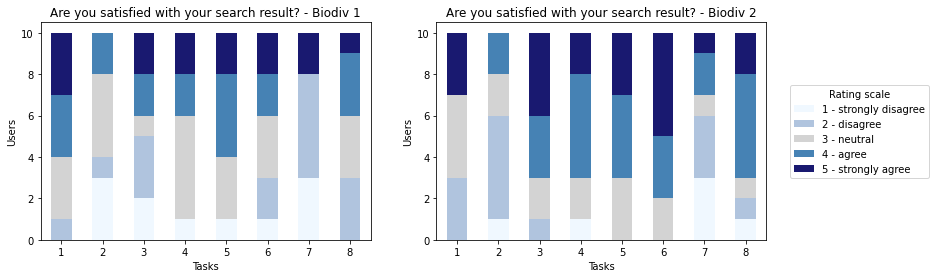

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4), sharey=False)

biodiv1 = data[data.system == 'Biodiv 1']
#biodiv1.head()

task_biodiv1 = biodiv1.groupby("task")
satisfaction_biodiv1 = task_biodiv1.satisfactionPerTask.value_counts().unstack()

satisfaction_biodiv1.plot(kind="bar", stacked=True, legend=False,ax=axes[0], title="Are you satisfied with your search result? - Biodiv 1", rot=0,color=colors5)
axes[0].set_xlabel("Tasks")
axes[0].set_ylabel("Users")

biodiv2 = data[data.system == 'Biodiv 2']
#biodiv1.head()

task_biodiv2 = biodiv2.groupby("task")
satisfaction_biodiv2 = task_biodiv2.satisfactionPerTask.value_counts().unstack()

satisfaction_biodiv2.plot(kind="bar", stacked=True, legend=False,ax=axes[1], title="Are you satisfied with your search result? - Biodiv 2", rot=0,color=colors5)
axes[1].set_xlabel("Tasks")
axes[1].set_ylabel("Users")

fig.legend(title="Rating scale", loc="center", bbox_to_anchor=(1, .5), labels=['1 - strongly disagree', '2 - disagree', '3 - neutral','4 - agree','5 - strongly agree'])
fig.savefig('satisfactionPerTask.pdf',bbox_inches='tight')

### Familiar with topic

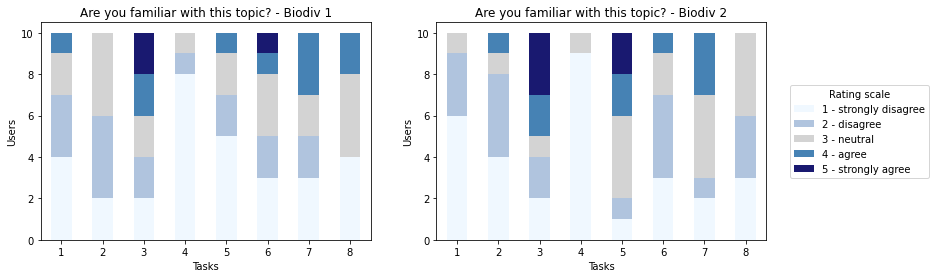

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4), sharey=False)

biodiv1 = data[data.system == 'Biodiv 1']
#biodiv1.head()

task_biodiv1 = biodiv1.groupby("task")
familiarTopic_biodiv1 = task_biodiv1.familiarWithTopic.value_counts().unstack()

familiarTopic_biodiv1.plot(kind="bar", stacked=True, legend=False,ax=axes[0], title="Are you familiar with this topic? - Biodiv 1", rot=0,color=colors5)
axes[0].set_xlabel("Tasks")
axes[0].set_ylabel("Users")

biodiv2 = data[data.system == 'Biodiv 2']
#biodiv1.head()

task_biodiv2 = biodiv2.groupby("task")
familiarTopic_biodiv2 = task_biodiv2.familiarWithTopic.value_counts().unstack()

familiarTopic_biodiv2.plot(kind="bar", stacked=True, legend=False,ax=axes[1], title="Are you familiar with this topic? - Biodiv 2", rot=0,color=colors5)
axes[1].set_xlabel("Tasks")
axes[1].set_ylabel("Users")

fig.legend(title="Rating scale", loc="center", bbox_to_anchor=(1, .5), labels=['1 - strongly disagree', '2 - disagree', '3 - neutral','4 - agree','5 - strongly agree'])
fig.savefig('familiarWithTopicPerTask.pdf',bbox_inches='tight')

### Easy to do the task

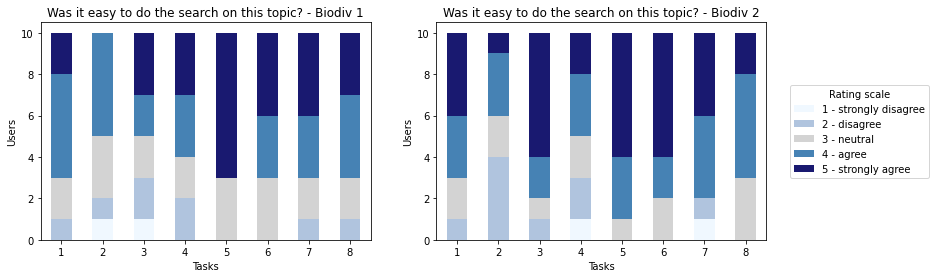

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4), sharey=False)

biodiv1 = data[data.system == 'Biodiv 1']
#biodiv1.head()

task_biodiv1 = biodiv1.groupby("task")
easyToDoTask_biodiv1 = task_biodiv1.easyToDoTheTask.value_counts().unstack()

easyToDoTask_biodiv1.plot(kind="bar", stacked=True, legend=False,ax=axes[0], title="Was it easy to do the search on this topic? - Biodiv 1", rot=0,color=colors5)
axes[0].set_xlabel("Tasks")
axes[0].set_ylabel("Users")

biodiv2 = data[data.system == 'Biodiv 2']
#biodiv1.head()

task_biodiv2 = biodiv2.groupby("task")
easyToDoTask_biodiv2 = task_biodiv2.easyToDoTheTask.value_counts().unstack()

easyToDoTask_biodiv2.plot(kind="bar", stacked=True, legend=False,ax=axes[1], title="Was it easy to do the search on this topic? - Biodiv 2", rot=0,color=colors5)
axes[1].set_xlabel("Tasks")
axes[1].set_ylabel("Users")

fig.legend(title="Rating scale", loc="center", bbox_to_anchor=(1, .5), labels=['1 - strongly disagree', '2 - disagree', '3 - neutral','4 - agree','5 - strongly agree'])
fig.savefig('easyToDoTheTaskPerTask.pdf',bbox_inches='tight')

### Easy to get started - Biodiv 1

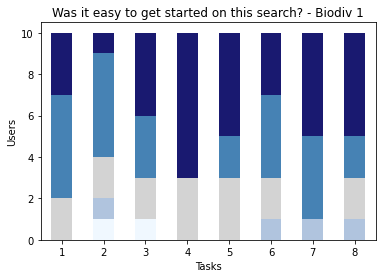

In [45]:
biodiv1 = data[data.system == 'Biodiv 1']
#biodiv1.head()

task_biodiv1 = biodiv1.groupby("task")
easyToGetStarted_biodiv1 = task_biodiv1.easyToGetStarted.value_counts().unstack()

fig = easyToGetStarted_biodiv1.plot(kind="bar", stacked=True, legend=False, title="Was it easy to get started on this search? - Biodiv 1", rot=0,color=colors5)
fig.set_xlabel("Tasks")
fig.set_ylabel("Users")


#fig.legend(title="Rating scale", loc="center", bbox_to_anchor=(1.25, .5), labels=['1 - strongly disagree', '2 - disagree', '3 - neutral','4 - agree','5 - strongly agree'])
#fig.savefig('easyToGetStartedPerTask.pdf')
plt.savefig('easyToGetStartedPerTaskBiodiv1.pdf',bbox_inches='tight')

### Easy to get started - Biodiv 2

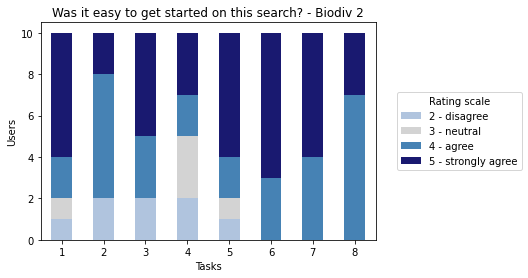

In [46]:
biodiv2 = data[data.system == 'Biodiv 2']
biodiv2.head()

task_biodiv2 = biodiv2.groupby("task")
easyToGetStarted_biodiv2 = task_biodiv2.easyToGetStarted.value_counts().unstack()

fig = easyToGetStarted_biodiv2.plot(kind="bar", stacked=True, legend=True,title="Was it easy to get started on this search? - Biodiv 2", rot=0,color=colors4)
fig.set_xlabel("Tasks")
fig.set_ylabel("Users")

fig.legend(title="Rating scale", loc="center", bbox_to_anchor=(1.25, .5), labels=['2 - disagree', '3 - neutral','4 - agree','5 - strongly agree'])
plt.savefig('easyToGetStartedPerTaskBiodiv2.pdf',bbox_inches='tight')

### Time per task

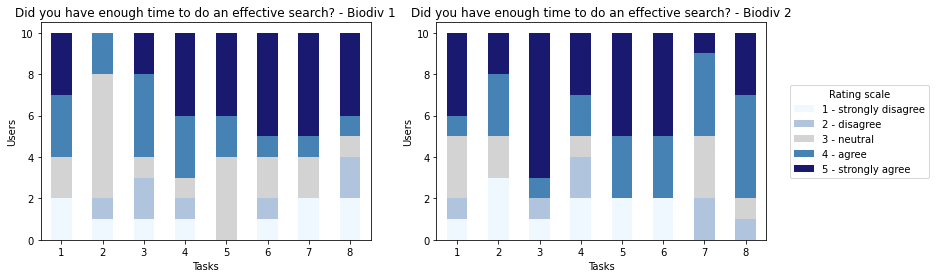

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4), sharey=False)

biodiv1 = data[data.system == 'Biodiv 1']
#biodiv1.head()

task_biodiv1 = biodiv1.groupby("task")
timePerTask_biodiv1 = task_biodiv1.timePerTask.value_counts().unstack()

timePerTask_biodiv1.plot(kind="bar", stacked=True, legend=False,ax=axes[0], title="Did you have enough time to do an effective search? - Biodiv 1", rot=0,color=colors5)
axes[0].set_xlabel("Tasks")
axes[0].set_ylabel("Users")

biodiv2 = data[data.system == 'Biodiv 2']
#biodiv1.head()

task_biodiv2 = biodiv2.groupby("task")
timePerTask_biodiv2 = task_biodiv2.timePerTask.value_counts().unstack()

timePerTask_biodiv2.plot(kind="bar", stacked=True, legend=False,ax=axes[1], title="Did you have enough time to do an effective search? - Biodiv 2", rot=0,color=colors5)
axes[1].set_xlabel("Tasks")
axes[1].set_ylabel("Users")

fig.legend(title="Rating scale", loc="center", bbox_to_anchor=(1, .5), labels=['1 - strongly disagree', '2 - disagree', '3 - neutral','4 - agree','5 - strongly agree'])
fig.savefig('timeToDoTheSearchPerTask.pdf',bbox_inches='tight')

count     80.000000
mean     225.337500
std       68.770936
min       63.000000
25%      170.000000
50%      220.000000
75%      300.000000
max      300.000000
Name: task_full_time, dtype: float64
count     80.000000
mean     204.462500
std       84.350076
min       35.000000
25%      143.000000
50%      220.000000
75%      290.000000
max      300.000000
Name: task_full_time, dtype: float64


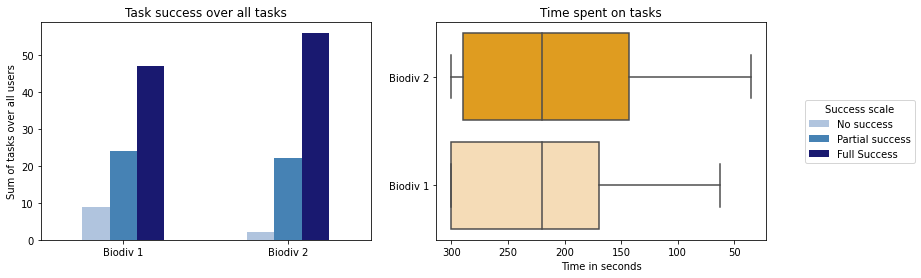

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4), sharey=False)

# Set your custom color palette
sns.set_palette(sns.color_palette(paletteSystem))

sns.boxplot(x = data.task_full_time, y = data.system,ax=axes[1])

# hue = data.success.replace(0, "No success").replace(1, "Partial success").replace(2, "Full success"),
                #hue_order = ["No success", "Partial success", "Full success"]

axes[1].set_xlabel("Time in seconds")
axes[1].set_ylabel("")
axes[1].set_title("Time spent on tasks")
axes[1].invert_xaxis()

biodiv1 = data[data.system == 'Biodiv 1']
biodiv2 = data[data.system == 'Biodiv 2']
print( biodiv1.task_full_time.describe() )
print( biodiv2.task_full_time.describe() )

success_data = data_sys.success.value_counts().unstack()
success_data.columns = ["No success", "Partial success", "Full Success"]

success_data.plot(kind="bar", ax=axes[0], legend=False, title="Task success over all tasks", rot=0, color=colors3)
axes[0].set_xlabel("")
axes[0].set_ylabel("Sum of tasks over all users")

fig.legend(title="Success scale", loc="center", bbox_to_anchor=(1, .5), labels=["No success", "Partial success", "Full Success"])
fig.savefig('taskSuccessTime.pdf',bbox_inches='tight')


### Task success per task

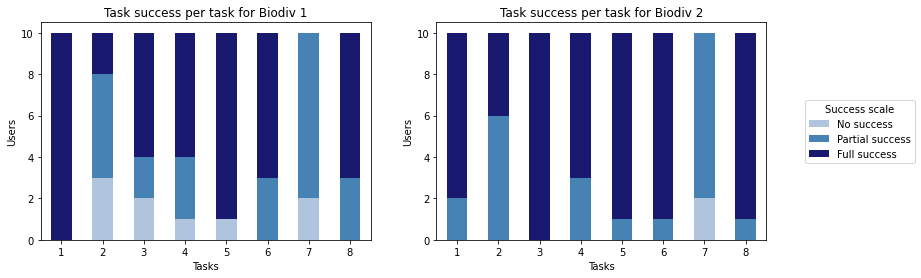

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4), sharey=False)
biodiv1 = data[data.system == 'Biodiv 1']
#biodiv1.head()

task_biodiv1 = biodiv1.groupby("task")
task_biodiv1 = task_biodiv1.success.value_counts().unstack()
task_biodiv1.columns = ["No success", "Partial success", "Full Success"]

task_biodiv1.plot(kind="bar", stacked=True, legend=False,ax=axes[0], title="Task success per task for Biodiv 1", rot=0,color=colors3)
axes[0].set_xlabel("Tasks")
axes[0].set_ylabel("Users")

biodiv2 = data[data.system == 'Biodiv 2']
#biodiv1.head()
task_biodiv2 = biodiv2.groupby("task")
task_biodiv2 = task_biodiv2.success.value_counts().unstack()
task_biodiv2.columns = ["No success", "Partial success", "Full Success"]

task_biodiv2.plot(kind="bar", stacked=True, legend=False,ax=axes[1], title="Task success per task for Biodiv 2", rot=0,color=colors3)
axes[1].set_xlabel("Tasks")
axes[1].set_ylabel("Users")

fig.legend(title="Success scale", loc="center", bbox_to_anchor=(1, .5), labels=['No success', 'Partial success', 'Full success'])
fig.savefig('taskSuccessPerTask.pdf',bbox_inches='tight')

## Log files


In [50]:
#logs = sns.load_dataset("logs")
#logs_melted = pd.melt(logs)

clicksBiodiv1 = logs['clicksCountedBiodiv1'].sum()
print('total number of clicks - Biodiv1:'+str(clicksBiodiv1))
clicksBiodiv2 = logs['clicksCountedBiodiv2'].sum()
print('total number of clicks - Biodiv2:'+str(clicksBiodiv2))
biodivClicksBiodiv1 = logs['BiodivClicksCountedBiodiv1'].sum()
print('"highlight biodiv" clicks - Biodiv1:'+str(biodivClicksBiodiv1))
biodivClicksBiodiv2 = logs['BiodivClicksCountedBiodiv2'].sum()
print('"highlight biodiv" clicks - Biodiv2:'+str(biodivClicksBiodiv2))



total number of clicks - Biodiv1:448
total number of clicks - Biodiv2:465
"highlight biodiv" clicks - Biodiv1:101
"highlight biodiv" clicks - Biodiv2:75
